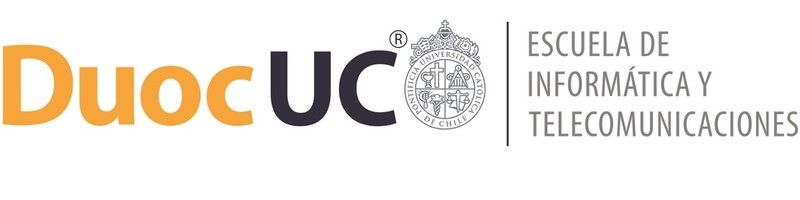

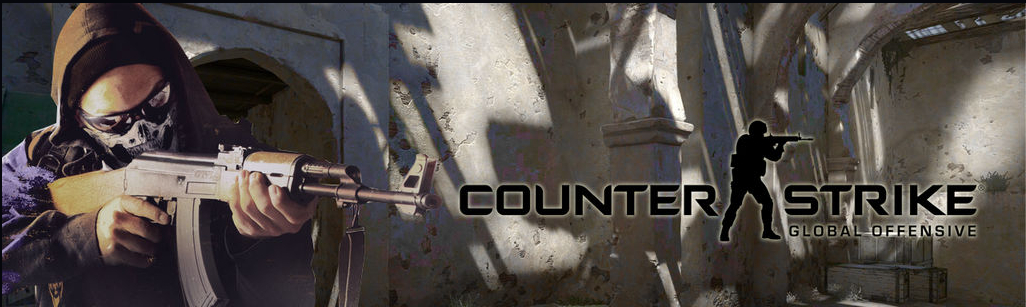

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Benjamín Mpya
* José Peña

Docente:     Francisco Parra

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

# Medidas de tendencia central:
 La estadística descriptiva permite calcular medidas de tendencia central, como la media (promedio) y la mediana, que pueden proporcionar información sobre el rendimiento promedio de los jugadores, el puntaje del equipo, el daño infligido, etc. Estas medidas pueden ayudar a entender de cierta manera como se comportan las variables.

# Medidas de dispersión:
La estadística descriptiva aplicada al caso también incluye medidas de dispersión, como la desviación estándar y el rango intercuartílico. Estas medidas proporcionan información sobre la variabilidad de los datos, lo que puede ser útil para evaluar la consistencia  y variablidida por ejemplo más adelante en el valor de equipamiento de cada equipo.

# Gráficos y visualizaciones:
 Se crean graficos y visualizaciones para representar y poder observar de una manera más optima las variables que se presentan en el caso, por ejemplo alguna oblicuidad de alguna variable o las mismas correlaciones de las distintas variables que hay en el dataset, esto se hace gracias al mapa de calor.

# Hipótesis de Regresión:

Hipótesis: Existe una relación entre el tiempo de vida del jugador (MatchKills) y la distancia recorrida (MatchFlankKills) en el juego Counter-Strike: Global Offensive.

Explicación: se quiere saber si existe una relación positiva entre la cantidad de asesinatos en un partido de un videojuego (MatchKills) y la cantidad de asesinatos realizados flanqueando al oponente (MatchFlankKills). En otras palabras, se puede suponer que a medida que aumenta el número de asesinatos totales en un partido, también aumenta el número de asesinatos realizados mediante flanqueo.

Método: Se utilizará la regresión lineal. La regresión lineal busca modelar la relación entre una variable dependiente (MatchFlankKills en este caso) y una o más variables independientes (MatchKills en este caso). El objetivo es encontrar una ecuación lineal que mejor se ajuste a los datos y pueda predecir el valor de la variable dependiente en función de las variables independientes.

# Hipótesis de Clasificación:

Hipótesis: El equipo que gana la ronda (RoundWinner) está influenciado por el número de asesinatos realizados en esa ronda (RoundKills) en el juego Counter-Strike: Global Offensive.

Explicación: Se plantea la hipótesis de que el número de asesinatos realizados por un equipo en una ronda específica puede afectar la probabilidad de que ese equipo gane la ronda. Se espera que un mayor número de asesinatos esté asociado con una mayor probabilidad de ganar la ronda.

Método: Se utilizará el análisis de clasificación binaria para evaluar la relación entre las variables RoundKills y RoundWinner. Se construirá un modelo de clasificación binaria, como la regresión logística, para predecir la variable RoundWinner utilizando el número de asesinatos como característica predictiva.


# Algunas preguntas para la hipotesis
Que factores pueden afectar a la cantidad de bajas (numerica) de una partida o incluso si gana la (boolean)ronda o no

MatchKills                     
MatchHeadshots              
RoundId                        
MatchFlankKills

RoundWinner


*   Cunatos heashots son en comparación de las kills totales
*   Cuantas Flankills son en comparación las kills totales
*   El tiempo que sobrevivió
*   Cuanta distancia recorrió
*   A que equipo pertenece
*   El valor del equipamiento del jugador
*   Si poseía arma primaria
*   Si se le cayó la conexión
*   Que afecte la cantidad de bajas si ocupa o no granadas letales y  no letales



## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
# CARGA DE LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carga de datos dandole la ruta de mi google drive

data = pd.read_csv('/content/drive/MyDrive/Datos-CSGO/demo_round_traces_fixed.csv', sep=";")

In [ ]:
'''# Insertar cuantos bloques de código y markdown consideren necesarios

# CARGA DE DATOS
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn

 #Se lee el dataset
data = pd.read_csv(name, sep=";")

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación'''

'# Insertar cuantos bloques de código y markdown consideren necesarios\n\n# CARGA DE DATOS\nfrom google.colab import files\nuploaded = files.upload()\nfor fn in uploaded.keys():\n    name=fn\n\n #Se lee el dataset\ndata = pd.read_csv(name, sep=";")\n\n# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de\n# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos\n# revisados en la asignatura con lo planteado como caso de estudio.\n# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación'

In [ ]:
#Se muestran los 10 primeros registros de los datos
data.head(10)

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120249,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,43.486626,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,37.354698,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,47.678861,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,53.122511,...,0,0,0,0,1000,4400,0,0,0,0
5,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,53.122511,...,0,0,0,0,850,3750,0,0,0,0
6,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,53.122511,...,0,0,0,0,400,3750,0,0,0,0
7,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,53.122511,...,0,1,0,0,800,3750,0,0,1,0
8,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,53.122511,...,3,0,1,1,850,3750,3,1,0,1
9,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,53.122511,...,2,0,2,0,850,3750,2,0,0,2


In [ ]:
#Nos indica todas las columnas que existen en el dataset
data.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
#Con este metodo podemos ver la cantidad de no nulos y el tipo de datos de cada columna
#OBS:Se ve que todas las columnas tienen la misma cantidad de valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79157 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  bool   
 6   MatchWinner                  79157 non-null  bool   
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  float64
 10  TravelledDistance            79157 non-null  float64
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

# Detalles de las distintas variables.



*   Map: Variable Categórica Nominal
*   Team: Variable Categórica Nominal
*   InternalTeamId: Variable Numérica Discreta
*   MatchId: Variable Numérica Discreta
*   RoundId: Variable Numérica Discreta
*   RoundWinner: Variable Categórica Nominal
*   MatchWinner: Variable Categórica Nominal
*   Survived: Variable Categórica Nominal
*   AbnormalMatch: Variable Categórica Nominal
*   TimeAlive: Variable Numérica Continua
*   TravelledDistance: Variable Numérica Continua
*   RLethalGrenadesThrown: Variable Numérica Discreta
*   RNonLethalGrenadesThrown: Variable Numérica Discreta
*   PrimaryAssaultRifle: Variable Numérica Continua
*   PrimarySniperRifle: Variable Numérica Continua
*   PrimaryHeavy: Variable Numérica Continua
*   PrimarySMG: Variable Numérica Continua
*   PrimaryPistol: Variable Numérica Discreta
*   FirstKillTime: Variable Numérica Continua
*   RoundKills: Variable Numérica Discreta
*   RoundAssists: Variable Numérica Discreta
*   RoundHeadshots: Variable Numérica Discreta
*   RoundFlankKills: Variable Numérica Discreta
*   RoundStartingEquipmentValue: Variable Numérica Discreta
*   TeamStartingEquipmentValue: Variable Numérica Discreta
*   MatchFlankKills: Variable Numérica Discreta
*   MatchAssists: Variable Numérica Discreta
*   MatchHeadshots: Variable Numérica Discreta

















In [ ]:
#Con este codigo nos especifica la cantidad de filas y columnas del dataset
print ('Los datos de del dataset tienen {0} filas y {1} columnas'.format(data.shape[0],data.shape[1]))

Los datos de del dataset tienen 79157 filas y 29 columnas


In [ ]:
#Con esta función de describe podemos ver los valores estadisticos de cada una de las variables pero que se muestren los valores en la columnas con el .T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.000000,2.000000,2.000000,2.000000e+00
MatchId,79157.0,250.525033,149.557804,4.0,128.000000,236.000000,373.000000,5.110000e+02
RoundId,79157.0,12.765517,7.432837,1.0,6.000000,12.000000,19.000000,3.600000e+01
TimeAlive,79157.0,72.795720,48.321035,0.0,47.080072,69.239615,92.647813,2.990560e+03
TravelledDistance,79157.0,104188.827403,354348.698897,0.0,58982.548256,86015.571135,121396.620621,3.964645e+07
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.000000,0.000000,1.000000,4.000000e+00
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.000000,1.000000,2.000000,6.000000e+00
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.000000,1.000000,1.000000,1.000000e+00
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.000000,0.000000,0.000000,1.000000e+00
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.000000,0.000000,0.000000,1.000000e+00


# Descripción estadistica:

# A partir de todos estas descripciones estadisticas podemos concluir algunas cosas como:

*   Con la columna count hay 79,157 observaciones disponibles para todas las variables.
*   La media de asesinatos es de 8.5 asesinatos, ademas como datos existe un maximo de 41 kills en una sola partida.

*   Al igual que la desviación estandar con la variables anterior que es 6.19 esto nos demuestra que los valores de asesinatos por partido tienden a variar considerablemente.

*   En cuanto el tiempo promedio que sobrevive cada jugador se puede observar que es de 72 segundos.

*   La primera kill más tardia fue a los 54 segundos.
*   El promedio de lo que se gasta por equipo es de 18.890 tambien teniendo una desviación estandar de 9.743 esto se entiende que por cada ronda podría cambiar la cantidad que se invierte en las armas que van relacionado a la calidad de estas.

*   Las maximas asistencias en una partida fueron de 14.
*   EL maximo número de headshots fue de 22 en una sola partida.









In [ ]:
#Se pueden ver la descripción de los valores no numericos ordenados por valores únicos
data.describe(exclude=[np.int64,np.float64]).T.sort_values(by="unique",ascending=False)

,count,unique,top,freq
Map,79157,4,de_inferno,28869
Team,79157,2,Terrorist,39592
RoundWinner,79157,2,False,39589
MatchWinner,79157,2,False,42018
Survived,79157,2,False,47214
AbnormalMatch,79157,1,False,79157


In [ ]:
#Se pueden ver la descripción de los valores no numericos ordenados por la frecuencia
data.describe(exclude=[np.int64,np.float64]).T.sort_values(by="freq",ascending=False)

,count,unique,top,freq
AbnormalMatch,79157,1,False,79157
Survived,79157,2,False,47214
MatchWinner,79157,2,False,42018
Team,79157,2,Terrorist,39592
RoundWinner,79157,2,False,39589
Map,79157,4,de_inferno,28869


In [ ]:
#Separaremos las variables numéricas y categóricas.
#obs: En las variables categoricas se encontraron 6, 4 booleanas y 2 de tipo objeto

numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en el dataset".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 23 columnas numéricas y 6 columnas categóricas en el dataset


# **KPIs**

In [ ]:
# Cantidad de derrotas y triunfos
cantidad_derrotas = data['MatchWinner'].value_counts()[False]
cantidad_triunfos = data['MatchWinner'].value_counts()[True]

# Promedio de tiempo de partida
promedio_tiempo_partida = data['TimeAlive'].mean()

# Otros KPI relevantes
promedio_asesinatos_partida = data['MatchKills'].mean()
promedio_distancia_recorrida_partida = data['TravelledDistance'].mean()

# Cantidad de partidas jugadas
cantidad_partidas = len(data['MatchId'].unique())

# Porcentaje de partidas anormales
porcentaje_anormales = (data['AbnormalMatch'].sum() / cantidad_partidas) * 100

# Promedio de asistencias por partida
promedio_asistencias = data['MatchAssists'].mean()


# Imprimir los resultados
print("Cantidad de derrotas:", cantidad_derrotas)
print("Cantidad de triunfos:", cantidad_triunfos)
print("Promedio de tiempo de partida:", promedio_tiempo_partida)
print("Promedio de asesinatos por partida:", promedio_asesinatos_partida)
print("Promedio de distancia recorrida por partida:", promedio_distancia_recorrida_partida)
print("Cantidad de partidas jugadas:", cantidad_partidas)
print("Porcentaje de partidas anormales:", porcentaje_anormales)
print("Promedio de asistencias por partida:", promedio_asistencias)


Cantidad de derrotas: 42018
Cantidad de triunfos: 37139
Promedio de tiempo de partida: 72.7957196614502
Promedio de asesinatos por partida: 8.511578255871243
Promedio de distancia recorrida por partida: 104188.82740322912
Cantidad de partidas jugadas: 333
Porcentaje de partidas anormales: 0.0
Promedio de asistencias por partida: 1.8748310319996968


# Se ven algunas indicadores (KPI) interesantes de analizar, que nos permite observar, por ejemplo los resultados de los equipos los promedios de tiempo en la partida, asesinatos en la partida, distancia recorrida y asistencias de este ultimo, ademas de ver un porcentaje de partidas anormales que es igual a cero y la cantidad de partidas jugadas.

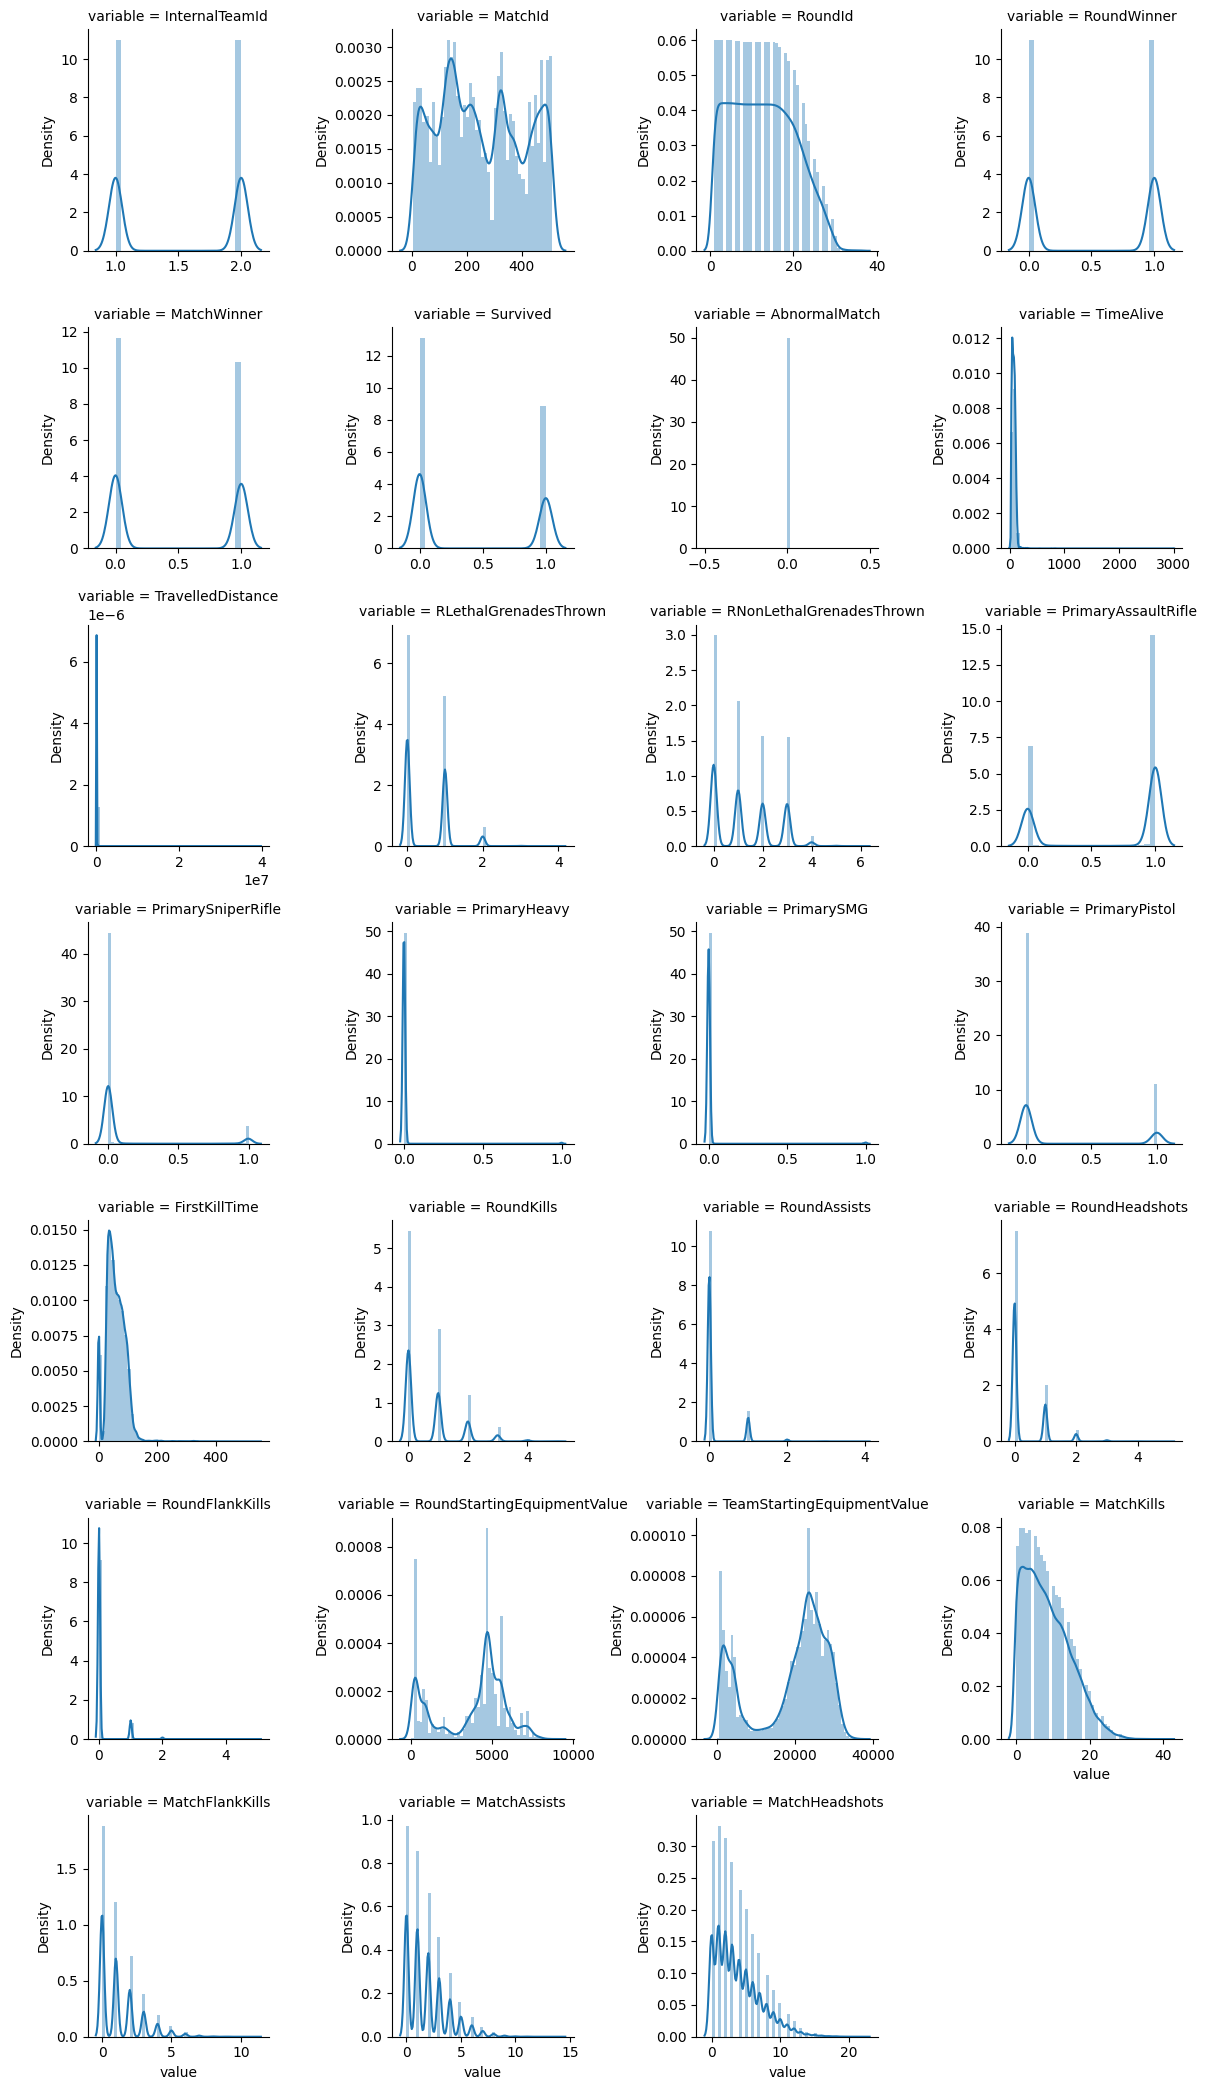

In [ ]:

# Finalmente, para obtener una visión rápida de todas las variables en un conjunto de datos,
# tracemos histogramas para todas las variables numéricas para determinar cuales de ellas  variables están sesgadas.
import warnings

warnings.filterwarnings("ignore")  # Ignorar los mensajes de advertencia para que el codigo sea más corto

num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars=num)
n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)
n1 = n1.map(sns.distplot, 'value')
n1


In [ ]:
#Con este código vemos la asimetria de las distintas variables, lo optimo es que este entre -0.5 y 0.5

numeric_data.skew(axis = 0, skipna = True).sort_values(ascending=False).head(20)

TravelledDistance           47.631552
TimeAlive                   26.971260
PrimaryHeavy                12.767253
PrimarySMG                  11.780949
RoundFlankKills              3.561828
PrimarySniperRifle           2.876979
RoundAssists                 2.698485
RoundHeadshots               2.048257
FirstKillTime                1.675945
MatchFlankKills              1.468016
PrimaryPistol                1.339363
RoundKills                   1.318520
MatchAssists                 1.151970
MatchHeadshots               1.003930
RLethalGrenadesThrown        0.797773
MatchKills                   0.669909
RNonLethalGrenadesThrown     0.467176
RoundId                      0.219198
MatchId                      0.135978
InternalTeamId              -0.000025
dtype: float64

In [ ]:
#Se cre la función que permite detectar los outliers

def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = pd.concat([outliers, pd.DataFrame({'Feature': column, 'Number of Outliers': df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]}, index=[0])], ignore_index=True)
    return outliers.sort_values(by="Number of Outliers", ascending=False)


In [ ]:
#Con esto ejecutamos los valores atipicos, estos se encuentran significativamente alejadas de la mayoría de los demás puntos de datos en un conjunto
detect_outliers(data)

,Feature,Number of Outliers
15,RoundHeadshots,19582
11,PrimaryPistol,17556
14,RoundAssists,10692
8,PrimarySniperRifle,9570
16,RoundFlankKills,6962
13,RoundKills,3505
4,TravelledDistance,1262
20,MatchFlankKills,1184
21,MatchAssists,781
22,MatchHeadshots,724


# Los outliers que se presentan la mayoria son relacionados a las rondas de cada partida, y se logra entender que donde cada partida tiene minimo 16 rondas que se juegan es normal que hayan tantos datos atipicos.

#Se plantea  tratar la variable objetivo ejecutando el codigo para que normalice los datos atipicos de la variable MatchKills, para que graficamente tenga una simetria de 0.5 (pasó de 0.66 a 0.5). Los demas outliers no se consideraran para el analisis

In [ ]:
#Se quiere comprobar si existen valores nulos

# Imprimir la cantidad de columnas que contienen valores nulos
print("Cantidad de columnas con valores nulos:")
print(data.columns[data.isnull().any()].size)


#OBS: se observa que en el data set no se encuentra ningun valor nulo en todas las columnas

Cantidad de columnas con valores nulos:
0


# Se ve que no exsiten valores nulos  en el dataset, entonces no hay ninguna medida que se tenga que tomar con este tipo de datos.

<Axes: >

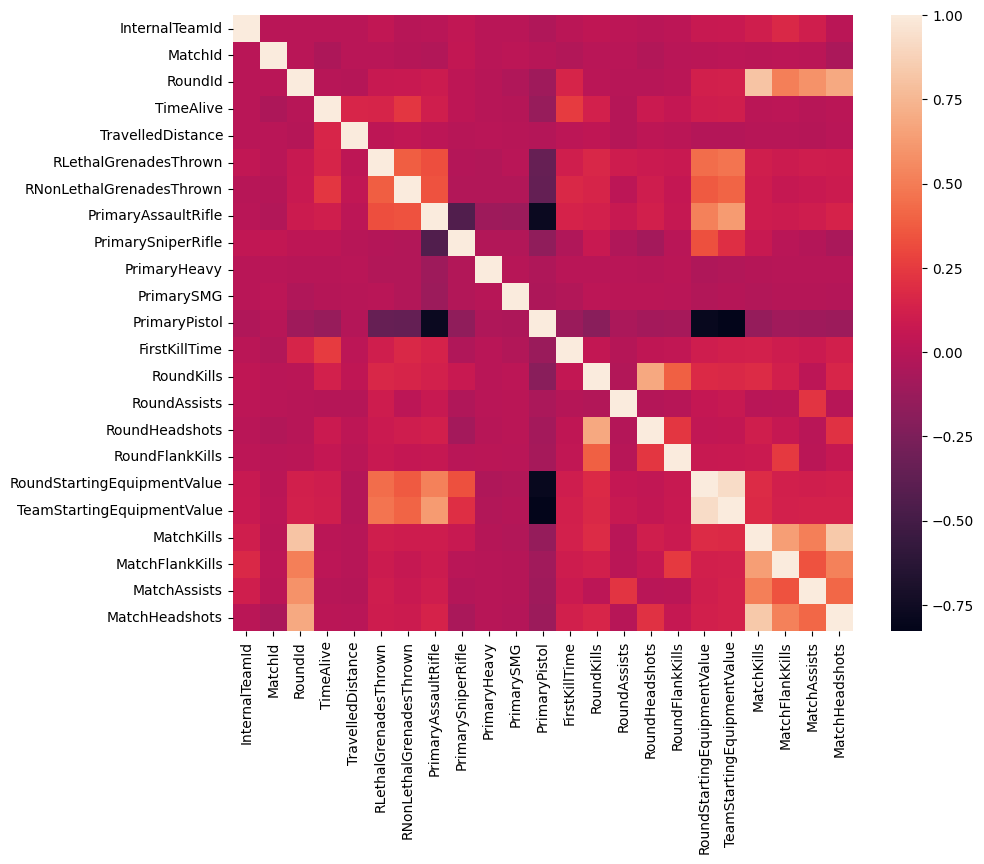

In [ ]:

# Ahora veremos la correlación entre las variables numéricas

corr = numeric_data.corr()
sns.heatmap(corr)

In [ ]:
#Se Elige de variable objetivo de MatchKills ya que es la que tiene mayor correlación con las demas variables

print (corr['MatchKills'].sort_values(ascending=False)[:15], '\n') #primeros 15 valores
print ('----------------------')
print (corr['MatchKills'].sort_values(ascending=False)[-10:]) # últimos 10 valores

MatchKills                     1.000000
MatchHeadshots                 0.831450
RoundId                        0.807501
MatchFlankKills                0.641599
MatchAssists                   0.510016
RoundKills                     0.183402
RoundStartingEquipmentValue    0.179080
TeamStartingEquipmentValue     0.178526
FirstKillTime                  0.127176
RoundHeadshots                 0.112018
RLethalGrenadesThrown          0.110577
InternalTeamId                 0.109532
RNonLethalGrenadesThrown       0.099642
PrimaryAssaultRifle            0.095224
RoundFlankKills                0.078891
Name: MatchKills, dtype: float64 

----------------------
PrimaryAssaultRifle    0.095224
RoundFlankKills        0.078891
PrimarySniperRifle     0.069314
TimeAlive              0.011149
MatchId                0.008026
RoundAssists           0.003477
TravelledDistance     -0.005264
PrimaryHeavy          -0.009765
PrimarySMG            -0.021469
PrimaryPistol         -0.147026
Name: MatchKills, dtyp

# **Caracteristicas relevantes**

# Las caracteristicas que se consideran para el objetivo del neogcio es analizar como se comportan las distintas variables con la variable objetivo y como se relacionan entre si, respecto a su linealidad y causalidad tambien los datos descriptivos que podemos concluir respecto a estas mismas.

# Se escoge como variable objetivo la variable MatchKills debido a que era la variable que tenia una mayor  corelación con las demas variables, en total 3 que estaban sobre el 0.60.

# Estas son:
                
*   MatchHeadshots : Representa la cantidad de headshots realizados en un partido. Los headshots suelen indicar una mayor precisión y habilidad de los jugadores, lo que puede influir en la cantidad de eliminaciones totales "MatchKills".  
*   RoundId : El número de ronda en un partido puede ser relevante, ya que diferentes rondas pueden tener dinámicas de juego distintas. Por ejemplo, las primeras rondas pueden ser más cautelosas, mientras que las últimas pueden ser más intensas y propensas a un mayor número de eliminaciones.
*   MatchFlankKills: Indica la cantidad de eliminaciones realizadas desde una posición de flanqueo. Los flanqueos exitosos pueden resultar en eliminaciones sorpresivas y rápidas, lo que podría estar relacionado con un mayor número de MatchKills.



# Se busca repsonder a las preguntas propuestas en la hipotesis planteada


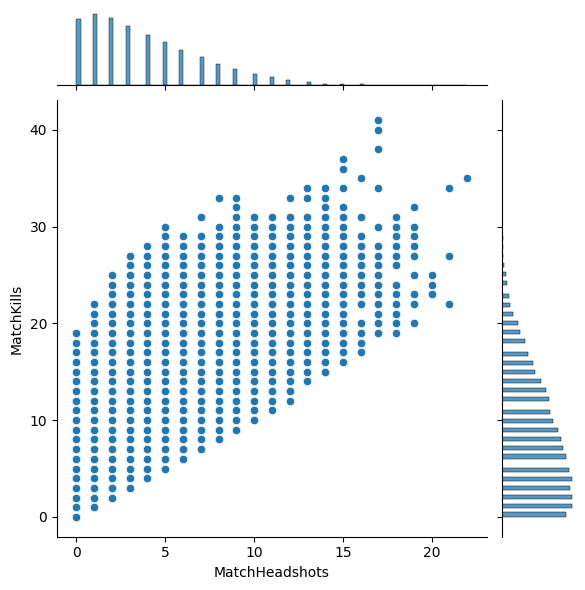

In [ ]:
#Se visualiza la variable objetivo (MatchKills) con la primera variable dependiente, por su correlación

sns.jointplot(x=data['MatchHeadshots'], y=data['MatchKills'])

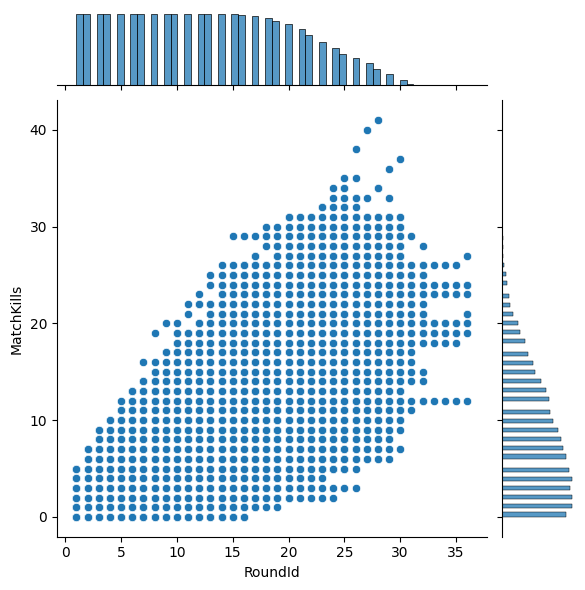

In [ ]:
#Se visualiza la variable objetivo (MatchKills) con la segunda variable dependiente, por su correlación

sns.jointplot(x=data['RoundId'], y=data['MatchKills'])

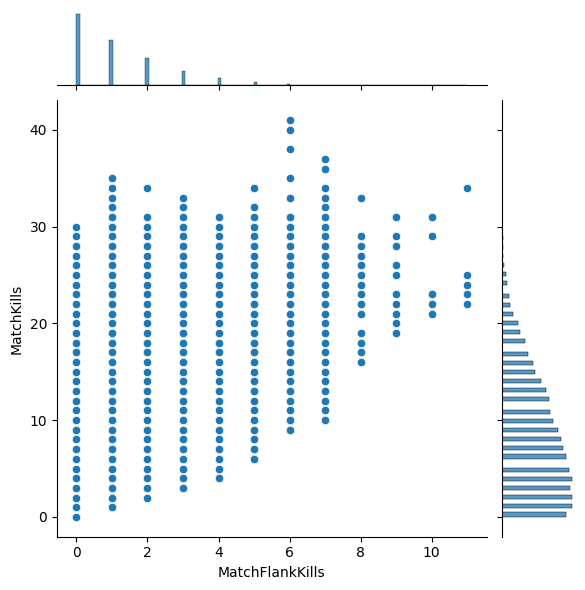

In [ ]:
#Se visualiza la variable objetivo (MatchKills) con la tercera variable dependiente, por su correlación

sns.jointplot(x=data['MatchFlankKills'], y=data['MatchKills'])

In [ ]:
#Se transforma las variables booleanas a object

int_to_object = ['RoundWinner','MatchWinner','Survived','AbnormalMatch']

for feature in int_to_object:
    data[feature] = data[feature].astype(object)


In [ ]:

# Ahora, avanzaremos y exploraremos las características categóricas.
# La forma más sencilla de entender las variables categóricas es usando el comando .describe().
cat_data.describe().T

,count,unique,top,freq
Map,79157,4,de_inferno,28869
Team,79157,2,Terrorist,39592
RoundWinner,79157,2,False,39589
MatchWinner,79157,2,False,42018
Survived,79157,2,False,47214
AbnormalMatch,79157,1,False,79157


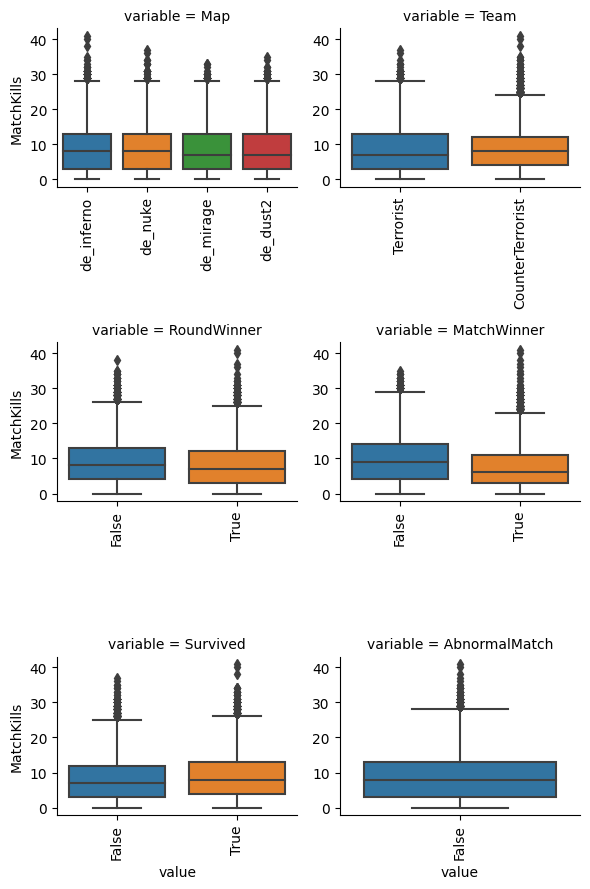

In [ ]:

# Ahora, creemos diagramas de caja para visualizar variables categóricas, object.
#
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in data.columns if data.dtypes[f] == 'object']

p = pd.melt(data, id_vars='MatchKills', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, 'value','MatchKills')
g


## Fase 3: Data Preparation


In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

# Se busca normalizar con transformaciones disponibles más famosas la variable objetivo en este caso es la variable MatchKills

#Se plantea ejecutar el codigo para que normalice los datos atipicos de la variable MatchKills, para que graficamente tenga una simetria de 0.5 (pasó de 0.66 a 0.5)

In [ ]:
data.drop(data[data['MatchKills'] > 23].index, inplace=True)
data.shape #Datos originales 79157

(77859, 29)

Skewness is 0.5000957451242848


<Axes: xlabel='MatchKills', ylabel='Density'>

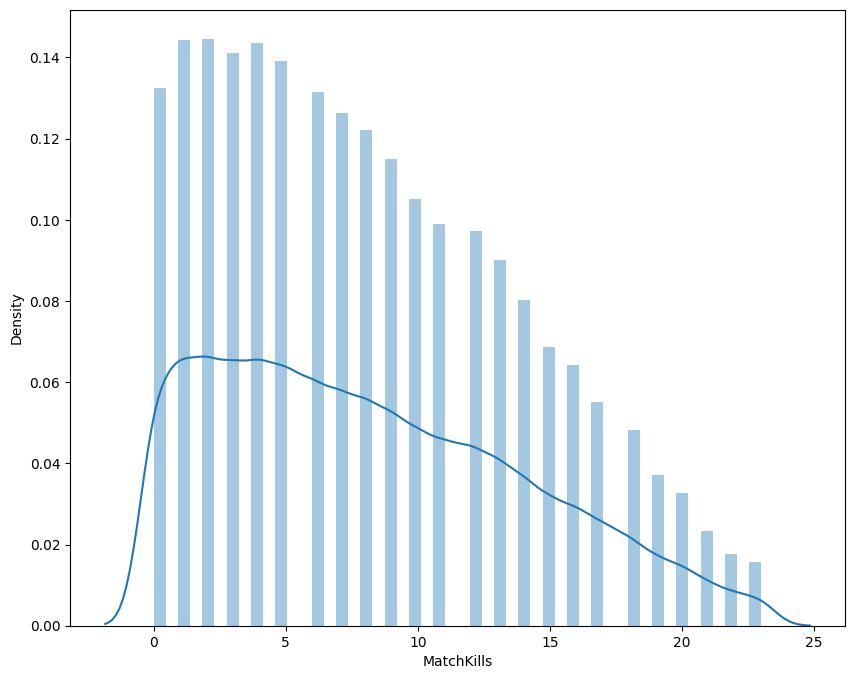

In [ ]:
print ('Skewness is', data['MatchKills'].skew())
sns.distplot(data['MatchKills'])



# Transformacion BOX COX



In [ ]:
import numpy as np
import scipy.stats as stats

# Filtra los valores no positivos
positive_data = data[data['MatchKills'] > 0]['MatchKills']

# Calcula la transformación de Box-Cox
transformed_data, lambda_value = stats.boxcox(positive_data)

# Calcula la skewness del conjunto de datos transformado
skewness_transformed = stats.skew(transformed_data)

# Define el rango objetivo de skewness
skewness_target_range = (-0.5, 0.5)

# Aplica la transformación inversa si la skewness no está dentro del rango objetivo
if not skewness_target_range[0] <= skewness_transformed <= skewness_target_range[1]:
    inverse_transformed_data = stats.boxcox(transf_data, lambda_value)

    # Calcula la skewness del conjunto de datos transformado inverso
    inverse_skewness_transformed = stats.skew(inverse_transformed_data)

    print(f"Skewness después de la transformación inversa: {inverse_skewness_transformed}")

# Imprime el valor de la skewness después de la transformación de Box-Cox
print(f"Skewness después de la transformación de Box-Cox: {skewness_transformed}")


Skewness después de la transformación de Box-Cox: -0.12008846304612605


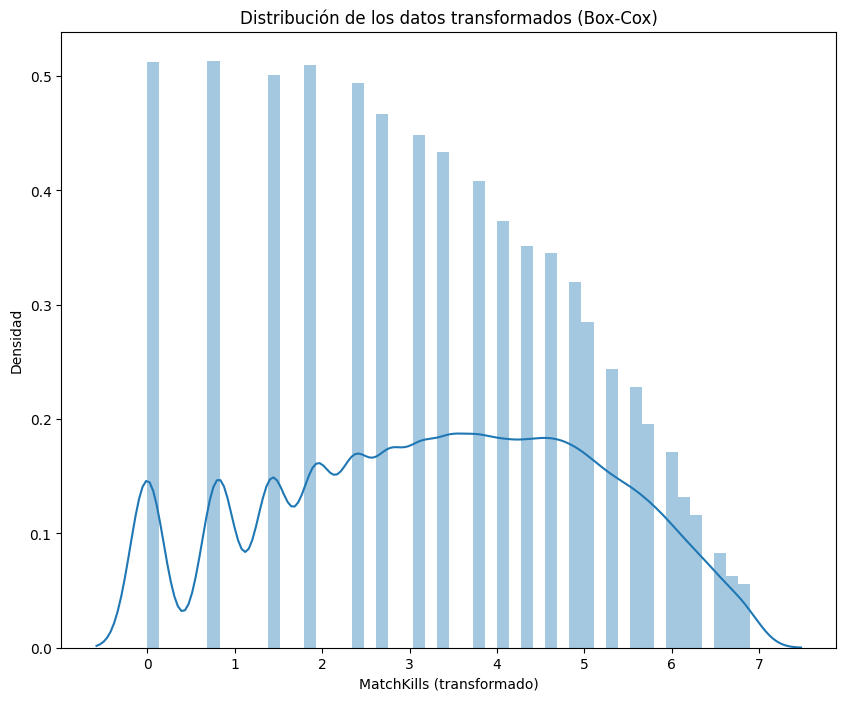

In [ ]:
import scipy.stats as stats
import seaborn as sns

# Filtra los valores no positivos
positive_data = data[data['MatchKills'] > 0]['MatchKills']

# Calcula la transformación de Box-Cox
transformed_data, lambda_value = stats.boxcox(positive_data)

# Crea el gráfico utilizando sns.distplot
sns.distplot(transformed_data)

# Configura las etiquetas y título del gráfico
plt.xlabel('MatchKills (transformado)')
plt.ylabel('Densidad')
plt.title('Distribución de los datos transformados (Box-Cox)')

# Muestra el gráfico
plt.show()



# Transformación raíz cuadrada

Skewness después de la transformación: -0.41084551165707134


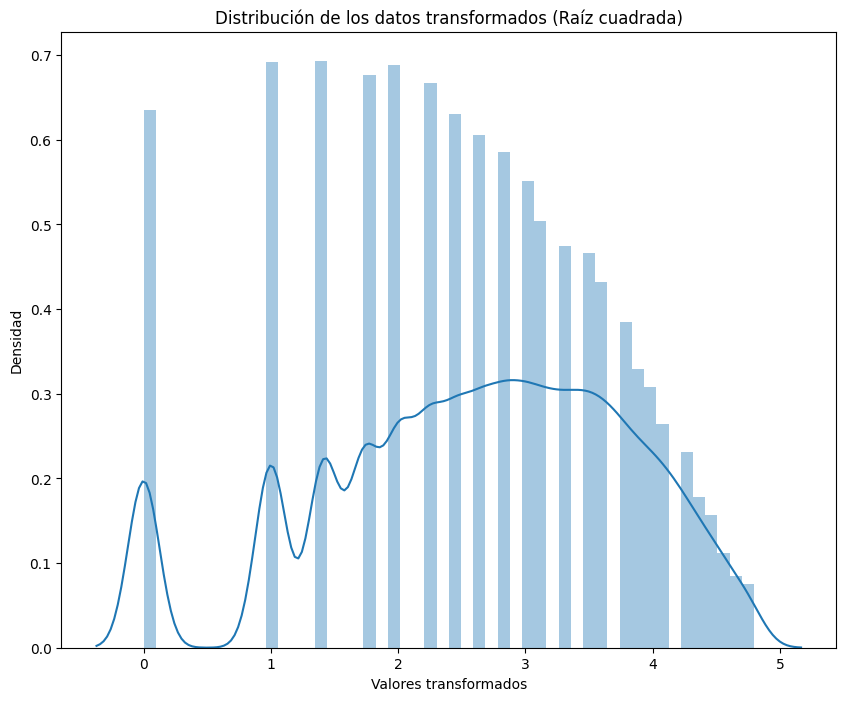

In [ ]:
import numpy as np
import seaborn as sns

# Aplica la transformación de raíz cuadrada
transformed_data = np.sqrt(data['MatchKills'])

# Calcula la skewness del conjunto de datos transformado
skewness = transformed_data.skew()
print('Skewness después de la transformación:', skewness)

# Visualiza el histograma de los datos transformados
sns.distplot(transformed_data)

# Añade etiquetas al gráfico
plt.title('Distribución de los datos transformados (Raíz cuadrada)')
plt.xlabel('Valores transformados')
plt.ylabel('Densidad')

# Muestra el gráfico
plt.show()


# Transformación Yeo-Johnson

Skewness después de la transformación: -0.11999359795182102


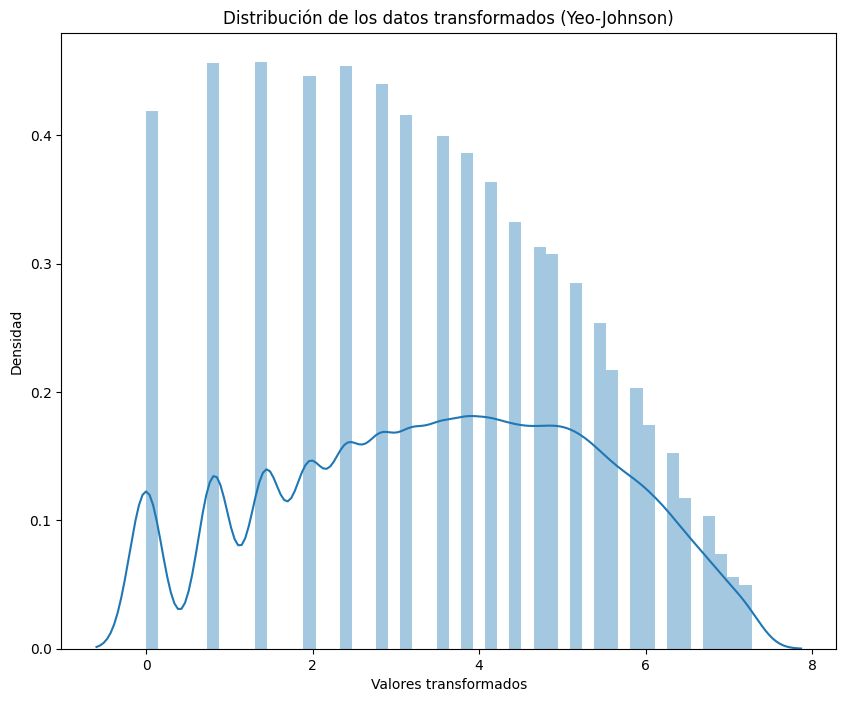

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Aplica la transformación Yeo-Johnson
transformed_data, lambda_value = stats.yeojohnson(data['MatchKills'])

# Calcula la skewness del conjunto de datos transformado
skewness = stats.skew(transformed_data)
print('Skewness después de la transformación:', skewness)

# Visualiza el histograma de los datos transformados
sns.distplot(transformed_data)

# Añade etiquetas al gráfico
plt.title('Distribución de los datos transformados (Yeo-Johnson)')
plt.xlabel('Valores transformados')
plt.ylabel('Densidad')

# Muestra el gráfico
plt.show()


# Transformación logaritmica

Skewness después de la transformación: -0.756115883745807


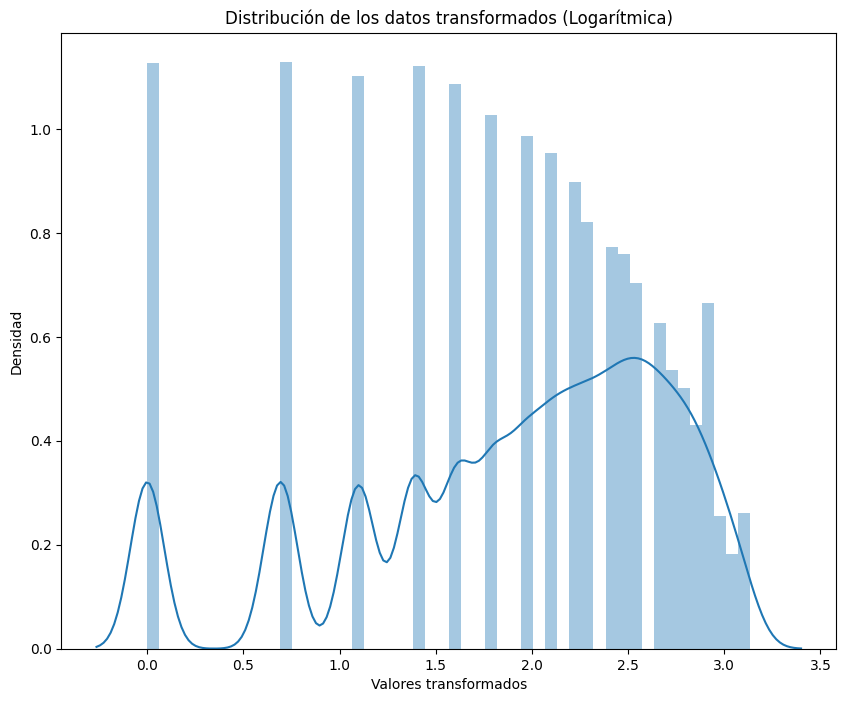

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los valores no positivos
positive_values = data['MatchKills'][data['MatchKills'] > 0]

# Aplica la transformación logarítmica a los valores positivos
transformed_data = np.log(positive_values)

# Calcula la skewness del conjunto de datos transformado
skewness = transformed_data.skew()
print('Skewness después de la transformación:', skewness)

# Visualiza el histograma de los datos transformados
sns.distplot(transformed_data)

# Añade etiquetas al gráfico
plt.title('Distribución de los datos transformados (Logarítmica)')
plt.xlabel('Valores transformados')
plt.ylabel('Densidad')

# Muestra el gráfico
plt.show()



In [ ]:
#
#
data['MatchKills'].groupby(data['MatchFlankKills']).unique()

MatchFlankKills
0     [0, 2, 3, 1, 4, 7, 6, 5, 10, 11, 12, 14, 15, 8...
1     [3, 4, 8, 10, 11, 12, 5, 6, 7, 13, 2, 1, 9, 15...
2     [9, 10, 12, 13, 6, 15, 7, 14, 16, 17, 4, 11, 1...
3     [15, 18, 20, 16, 17, 19, 5, 21, 8, 6, 4, 7, 14...
4     [23, 9, 10, 12, 13, 14, 15, 20, 16, 17, 18, 6,...
5     [12, 13, 14, 17, 19, 20, 21, 16, 18, 15, 11, 2...
6     [22, 12, 13, 17, 18, 19, 20, 23, 9, 10, 14, 11...
7     [16, 17, 18, 19, 14, 15, 20, 21, 23, 22, 10, 1...
8                          [16, 17, 18, 22, 19, 23, 21]
9                                  [20, 21, 23, 19, 22]
10                                         [21, 22, 23]
11                                             [22, 23]
Name: MatchKills, dtype: object

In [ ]:
data['MatchKills'].groupby(data['MatchFlankKills']).median()

MatchFlankKills
0      3.0
1      8.0
2     11.0
3     14.0
4     15.0
5     16.0
6     17.0
7     19.0
8     18.5
9     21.0
10    22.5
11    22.5
Name: MatchKills, dtype: float64

In [ ]:

# Ahora, codificaremos todas las variables categóricas.
# Esto es necesario porque la mayoría de los algoritmos de ML no aceptan valores categóricos,
# sino que se espera que se conviertan en numéricos.
# La función LABELENCODER de sklearn se usa para codificar variables.
# Escribiremos una función para hacer esto.
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# definicion de funcion factorize
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [ ]:
#Podemos ver los Contar la cantidad de los valores por cada columna quye hay disponible
varst = np.array(['Map','Team','RoundWinner','MatchWinner','Survived','AbnormalMatch'])
for i in varst:
  print("columna:",i)
  print(data[i].value_counts())
  print("\n")

columna: Map
de_inferno    28411
de_dust2      18844
de_mirage     18752
de_nuke       11852
Name: Map, dtype: int64


columna: Team
CounterTerrorist    39015
Terrorist           38844
Name: Team, dtype: int64


columna: RoundWinner
True     39008
False    38851
Name: RoundWinner, dtype: int64


columna: MatchWinner
False    41036
True     36823
Name: MatchWinner, dtype: int64


columna: Survived
False    46494
True     31365
Name: Survived, dtype: int64


columna: AbnormalMatch
False    77859
Name: AbnormalMatch, dtype: int64




In [ ]:

for x in varst:
         factorize(data, x)

In [ ]:
# Mostrando las 5 primeras filas del datframe
data.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,0,1,0,0,51.120249,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,0,1,0,0,43.486626,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,0,1,0,0,37.354698,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,0,1,0,0,47.678861,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,0,1,1,0,53.122511,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
# Recorriendo los subset para determinar si existen NaN, podemos verificar que no existe ningun valor
print('\n Estadísticas de')
for columna in data.columns:
    print('NaN de la columna {0}'.format(columna),"=",data[columna].isna().sum())


 Estadísticas de
NaN de la columna Map = 0
NaN de la columna Team = 0
NaN de la columna InternalTeamId = 0
NaN de la columna MatchId = 0
NaN de la columna RoundId = 0
NaN de la columna RoundWinner = 0
NaN de la columna MatchWinner = 0
NaN de la columna Survived = 0
NaN de la columna AbnormalMatch = 0
NaN de la columna TimeAlive = 0
NaN de la columna TravelledDistance = 0
NaN de la columna RLethalGrenadesThrown = 0
NaN de la columna RNonLethalGrenadesThrown = 0
NaN de la columna PrimaryAssaultRifle = 0
NaN de la columna PrimarySniperRifle = 0
NaN de la columna PrimaryHeavy = 0
NaN de la columna PrimarySMG = 0
NaN de la columna PrimaryPistol = 0
NaN de la columna FirstKillTime = 0
NaN de la columna RoundKills = 0
NaN de la columna RoundAssists = 0
NaN de la columna RoundHeadshots = 0
NaN de la columna RoundFlankKills = 0
NaN de la columna RoundStartingEquipmentValue = 0
NaN de la columna TeamStartingEquipmentValue = 0
NaN de la columna MatchKills = 0
NaN de la columna MatchFlankKills = 

In [ ]:
# Generando una estadistica descriptiva de las variables categoricas
newData = data[['Map','Team','RoundWinner','MatchWinner','Survived','AbnormalMatch']]

for columna in newData.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(newData[columna].describe())


Estadísticos de la columna Map
count    77859.000000
mean         1.303266
std          0.999905
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Map, dtype: float64

Estadísticos de la columna Team
count    77859.000000
mean         0.498902
std          0.500002
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Team, dtype: float64

Estadísticos de la columna RoundWinner
count    77859.000000
mean         0.501008
std          0.500002
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: RoundWinner, dtype: float64

Estadísticos de la columna MatchWinner
count    77859.000000
mean         0.472945
std          0.499271
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: MatchWinner, dtype: float64

Estadísticos de la columna Su

In [ ]:
# Verificado los datos NaN para posteriormente transformarlos
newData.isna().sum()

Map              0
Team             0
RoundWinner      0
MatchWinner      0
Survived         0
AbnormalMatch    0
dtype: int64

In [ ]:
# Información del dataframe newData
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77859 entries, 0 to 79156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Map            77859 non-null  int64
 1   Team           77859 non-null  int64
 2   RoundWinner    77859 non-null  int64
 3   MatchWinner    77859 non-null  int64
 4   Survived       77859 non-null  int64
 5   AbnormalMatch  77859 non-null  int64
dtypes: int64(6)
memory usage: 4.2 MB


In [ ]:
# Datos unicos de los subsets
#Estos son los valores existen en cada una de las columnas
for columna in newData.columns:
    print('\nEstadísticos de la columna {0}'.format(columna))
    print(newData[columna].unique())


Estadísticos de la columna Map
[1 3 2 0]

Estadísticos de la columna Team
[1 0]

Estadísticos de la columna RoundWinner
[0 1]

Estadísticos de la columna MatchWinner
[1 0]

Estadísticos de la columna Survived
[0 1]

Estadísticos de la columna AbnormalMatch
[0]


In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77859 entries, 0 to 79156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Map            77859 non-null  int64
 1   Team           77859 non-null  int64
 2   RoundWinner    77859 non-null  int64
 3   MatchWinner    77859 non-null  int64
 4   Survived       77859 non-null  int64
 5   AbnormalMatch  77859 non-null  int64
dtypes: int64(6)
memory usage: 4.2 MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77859 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          77859 non-null  int64  
 1   Team                         77859 non-null  int64  
 2   InternalTeamId               77859 non-null  int64  
 3   MatchId                      77859 non-null  int64  
 4   RoundId                      77859 non-null  int64  
 5   RoundWinner                  77859 non-null  int64  
 6   MatchWinner                  77859 non-null  int64  
 7   Survived                     77859 non-null  int64  
 8   AbnormalMatch                77859 non-null  int64  
 9   TimeAlive                    77859 non-null  float64
 10  TravelledDistance            77859 non-null  float64
 11  RLethalGrenadesThrown        77859 non-null  int64  
 12  RNonLethalGrenadesThrown     77859 non-null  int64  
 13  PrimaryAssaultRi

# Como interactuan las variable de roundwinner con una variable numerica pudiendo observarla graficamente:

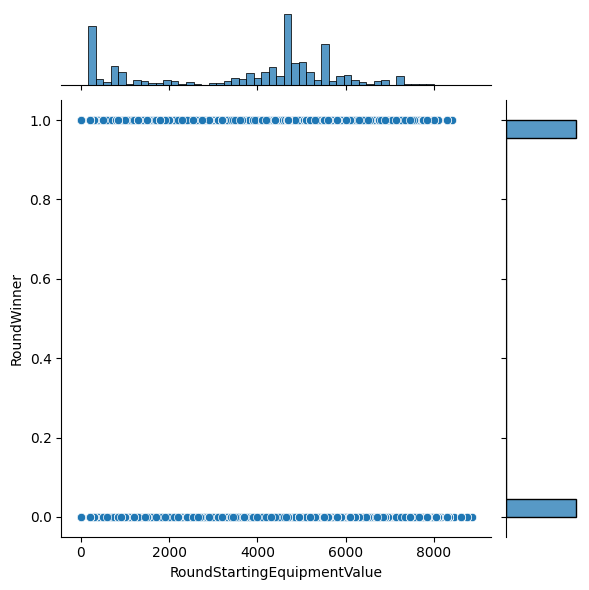

In [ ]:
sns.jointplot(x=data['RoundStartingEquipmentValue'], y=data['RoundWinner'])

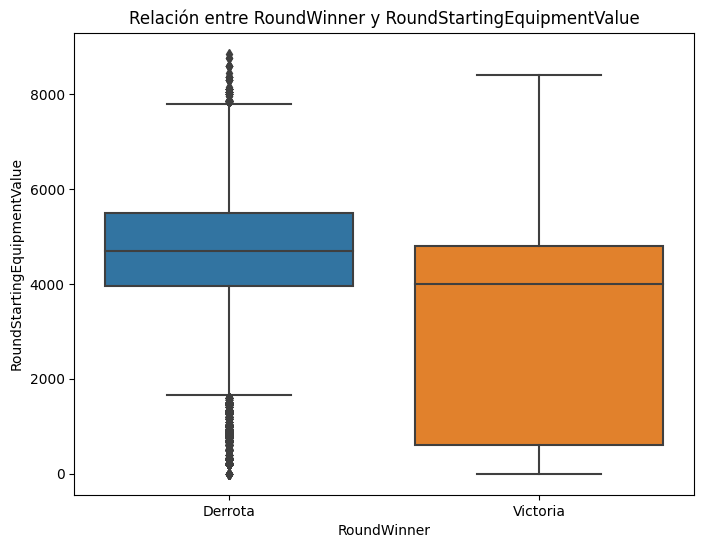

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataframe separado para las victorias y las derrotas
victorias = data[data['RoundWinner'] == True]
derrotas = data[data['RoundWinner'] == False]

# Crear el gráfico de boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='RoundWinner', y='RoundStartingEquipmentValue', data=data)
plt.xlabel('RoundWinner')
plt.ylabel('RoundStartingEquipmentValue')
plt.title('Relación entre RoundWinner y RoundStartingEquipmentValue')
plt.xticks([0, 1], ['Derrota', 'Victoria'])
plt.show()


## Fase 4: Modeling - Se dividen los datasets para que no se produzca un overfitting.

### Regresión

# Se prueban los algortimos de regresión para la hipotesis planteada al principio con la variable objetivo (MatchKills).

# Regresión lineal múltiple

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleccionar las características y la variable objetivo
X = data[['MatchHeadshots', 'RoundId', 'MatchFlankKills']]
y = data['MatchKills']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba random state eloge la semilla de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


print("--- Modelo Regresión lineal ---")

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2):", r2)


--- Modelo Regresión lineal ---
Error absoluto medio (MAE): 1.8289793850456162
Error cuadrático medio (MSE): 6.0206293303394265
Raíz del error cuadrático medio (RMSE): 2.4536970738743253
Coeficiente de determinación (R2): 0.820918502608516


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Seleccionar las características y la variable objetivo
X = data[['MatchHeadshots', 'RoundId', 'MatchFlankKills']]
y = data['MatchKills']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando todos los datos
model.fit(X, y)

# Valores para hacer una predicción
match_headshots = 5
round_id = 10
match_flank_kills = 2

# Crear un DataFrame con los valores de entrada
input_data = pd.DataFrame([[match_headshots, round_id, match_flank_kills]],
                          columns=['MatchHeadshots', 'RoundId', 'MatchFlankKills'])

# Convertir variables categóricas en variables numéricas
input_data = pd.get_dummies(input_data)

# Hacer la predicción utilizando el modelo entrenado
prediction = model.predict(input_data)

print("La predicción de MatchKills es:", prediction[0])


La predicción de MatchKills es: 9.186440359616803


# Arboles de decisión

In [ ]:
#Se aplica el gridsearch para encontrar los mejores hiperparametros para el modelo, respecto a su
#profundidad máxima del árbol, el número mínimo de muestras requeridas en una hoja y el número mínimo de muestras requeridas para dividir un nodo interno

from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(2,6),          # [2,3,4,5]
          "min_samples_split": np.arange(2,5),  # [2,3,4]
          "min_samples_leaf" : np.arange(1,5)} # [1,2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10,scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7962286233676721
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleccionar las características y la variable objetivo
X = data[['MatchHeadshots', 'RoundId', 'MatchFlankKills']]
y = data['MatchKills']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("--- Modelo Árbol de decisión ---")

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2):", r2)



--- Modelo Árbol de decisión ---
Error absoluto medio (MAE): 1.9696634375523328
Error cuadrático medio (MSE): 6.782634480636095
Raíz del error cuadrático medio (RMSE): 2.604349147222026
Coeficiente de determinación (R2): 0.7982529279903461


# **KNN**


 **Se establecen algunos hiperparametros para el funcionamiento optimo del algortimo KNN**


*   n_neighbors: Se ha establecido en 5, lo que indica que se utilizarán los 5 vecinos más cercanos para hacer la predicción.



*   weights: Se ha establecido en 'uniform', lo que significa que todos los vecinos tienen el mismo peso en la predicción.

*   algorithm: Se ha establecido en 'auto', lo que permite al algoritmo seleccionar automáticamente el método más adecuado según los datos de entrada.






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Seleccionar las características y la variable objetivo
X = data[['MatchHeadshots', 'RoundId', 'MatchFlankKills']]
y = data['MatchKills']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo KNN
model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("---Modelo KNN---")

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2):", r2)


---Modelo KNN---
Error absoluto medio (MAE): 1.9602620087336242
Error cuadrático medio (MSE): 7.010680708964809
Raíz del error cuadrático medio (RMSE): 2.6477690059680072
Coeficiente de determinación (R2): 0.791469773306202


Se le aumenta el número de vecinos para mejorar el rendimiento.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seleccionar las características y la variable objetivo
X = data[['MatchHeadshots', 'RoundId', 'MatchFlankKills']]
y = data['MatchKills']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo KNN con hiperparámetros
model = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto')

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("---Modelo KNN---")

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2):", r2)


---Modelo KNN---
Error absoluto medio (MAE): 1.869657076804521
Error cuadrático medio (MSE): 6.345392370922169
Raíz del error cuadrático medio (RMSE): 2.5190062268525995
Coeficiente de determinación (R2): 0.8112585404328192


Se prueba otro modelo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'RoundKills', 'FirstKillTime']]
y = data['TimeAlive']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de Random Forest para regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Raíz del error cuadrático medio (RMSE):", rmse)

Error absoluto medio (MAE): 21.944778675002215
Error cuadrático medio (MSE): 2784.3756480713737
Raíz del error cuadrático medio (RMSE): 52.76718343887016


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'RoundKills', 'FirstKillTime']]
y = data['TimeAlive']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Crear una instancia del modelo de Random Forest para regresión
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo utilizando todos los datos
model.fit(X, y)

# Valores para hacer una predicción
round_starting_equipment_value = 5000.0
round_kills = 3
first_kill_time = 20

# Crear un DataFrame con los valores de entrada
input_data = pd.DataFrame([[round_starting_equipment_value, round_kills, first_kill_time]],
                          columns=['RoundStartingEquipmentValue', 'RoundKills', 'FirstKillTime'])

# Convertir las variables categóricas en variables numéricas
input_data = pd.get_dummies(input_data)

# Hacer la predicción utilizando el modelo entrenado
prediction = model.predict(input_data)

print("La predicción de TimeAlive es:", prediction[0])



La predicción de TimeAlive es: 61.3699274963034


Se crea un modelo con otras variables  pero  como no tienen correlación los resultados de error son grandes y es normal que la predicción sea erronea.

### Clasificación



# **Regresión Logística**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'TimeAlive', 'Survived']]
y = data['RoundWinner']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

model.score(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Calcular la sensibilidad del modelo
recall = recall_score(y_test, y_pred)
print("Sensibilidad:", recall)

# Calcular la puntuación F1 del modelo
f1 = f1_score(y_test, y_pred)
print("Puntuación F1:", f1)


Precisión: 0.6741587464680195
Sensibilidad: 0.7328496881761487
Puntuación F1: 0.6941531042796866


# **Árbol de decisión**

Se le agregan hiperparameteros al modelo de arbol de decisión para poder tener un mejor rendimiento:

*   criterion: Especifica la función de medida de calidad utilizada para evaluar la calidad de una partición. Los valores comunes son "gini" para el índice de impureza de Gini y "entropy" para la ganancia de información.

*   max_depth: Controla la profundidad máxima del árbol. Limitar la profundidad ayuda a evitar el sobreajuste (overfitting). Un valor bajo puede resultar en un modelo demasiado simple, mientras que un valor alto puede llevar al sobreajuste.

*   min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno. Controla la creación de nuevas divisiones al verificar si el número de muestras en un nodo es mayor o igual a este valor.
*   min_samples_leaf: El número mínimo de muestras requeridas para estar en un nodo hoja. Controla la creación de nodos hoja asegurando que contengan un número mínimo de muestras.


*   max_features: El número máximo de características a considerar al buscar la mejor división. Limitar el número de características ayuda a evitar el sobreajuste y acelera el proceso de entrenamiento.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'TimeAlive', 'Survived']]
y = data['RoundWinner']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de árboles de decisión con hiperparámetros
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=2, max_features=None)

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Calcular la sensibilidad del modelo
recall = recall_score(y_test, y_pred)
print("Sensibilidad:", recall)

# Calcular la puntuación F1 del modelo
f1 = f1_score(y_test, y_pred)
print("Puntuación F1:", f1)


Precisión: 0.7043411250963267
Sensibilidad: 0.8643248059055619
Puntuación F1: 0.7468382272077422


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Seleccionar las características y la variable objetivo
X_train = data[['RoundStartingEquipmentValue', 'TimeAlive', 'Survived']]
y_train = data['RoundWinner']

# Convertir variables categóricas en variables numéricas
X_train = pd.get_dummies(X_train)

# Crear una instancia del modelo de árboles de decisión con hiperparámetros
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=2, max_features=None)

# Entrenar el modelo utilizando todos los datos
model.fit(X_train, y_train)

# Datos para hacer una predicción
new_data = pd.DataFrame({'RoundStartingEquipmentValue': [10000], 'TimeAlive': [55], 'Survived': [False]})

# Convertir variables categóricas en variables numéricas
new_data = pd.get_dummies(new_data)

# Hacer la predicción
prediction = model.predict(new_data)

# Imprimir la predicción
print("Predicción:", prediction)


Predicción: [1]


# **KNN**



*   n_neighbors: se establece en 5, lo que significa que se consideran los 5 vecinos más cercanos para la clasificación.

* weights: se establece en 'uniform', lo que significa que todos los vecinos tienen el mismo peso en la clasificación.

*   algorithm: se establece en 'auto', que selecciona automáticamente el algoritmo más adecuado según los datos.


* leaf_size: se establece en 30, que es el tamaño de hoja utilizado en el cálculo de vecinos más cercanos.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'TimeAlive', 'Survived']]
y = data['RoundWinner']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo KNN con hiperparámetros
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=15)

# Entrenar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Calcular la sensibilidad del modelo
recall = recall_score(y_test, y_pred)
print("Sensibilidad:", recall)

# Calcular la puntuación F1 del modelo
f1 = f1_score(y_test, y_pred)
print("Puntuación F1:", f1)



Precisión: 0.6649113793989211
Sensibilidad: 0.6785032455135548
Puntuación F1: 0.6714105793450882


## Fase 5: Evaluation

# **Regresión**

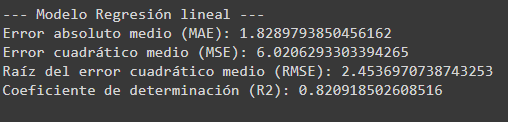

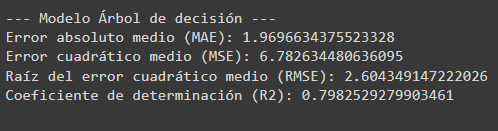

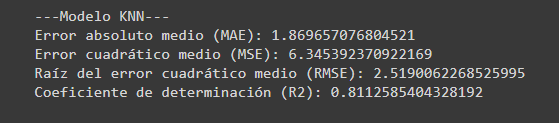

La elección del fue el de regresión lineal, el Modelo de regresión lineal  muestra mejores resultados que el KNN y árbol de decisión en todas las métricas de evaluación. El MAE más bajo indica que las predicciones del modelo tienden a estar más cerca de los valores reales. Además, tanto el MSE como el RMSE más bajos indican que las predicciones tienen un menor error promedio y una dispersión más cercana a los valores reales. Para finalizar se puede observar que el R2 es el más alto y más cercano a uno que los demas modelos

En consecuencia, se puede considerar que el Modelo de regresión lineal  y más confiable en este caso en comparación con los demas modelos.

Se toman las variables que se plantearon en un principio tomado de las hipotesis y que tenian mayor correlación entre ellas para probar los resultados los modelos de MatchKills, MatchFlankKills, RoundId, MatchHeadshots.

**Se prueba el modelo** Con el código de arriba en el modelamiento.

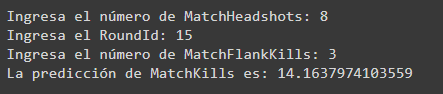

Como conclusión del modelo y la prueba una prediccion es que si el jugador cuando llegue la ronda 15, tenga 8 matchheadshots y 3 MatchFlankkills, lo más probable que en sum marcador ya lleve 14 kills en la partida.

# **Clasificación**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Seleccionar las características y la variable objetivo
X = data[['RoundStartingEquipmentValue', 'TimeAlive', 'Survived']]
y = data['RoundWinner']

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELO 1 - Regresión Logística
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# MODELO 2 - Árbol de decisión
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=2, max_features=None)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# MODELO 3 - KNN
model3 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=15)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

# Mostrar el classification report para cada modelo
print("Classification Report - Modelo 1 (Regresión Logística)")
print(classification_report(y_test, y_pred1))
print()

print("Classification Report - Modelo 2 (Árbol de decisión)")
print(classification_report(y_test, y_pred2))
print()

print("Classification Report - Modelo 3 (KNN)")
print(classification_report(y_test, y_pred3))


Classification Report - Modelo 1 (Regresión Logística)
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      7715
           1       0.66      0.73      0.69      7857

    accuracy                           0.67     15572
   macro avg       0.68      0.67      0.67     15572
weighted avg       0.68      0.67      0.67     15572


Classification Report - Modelo 2 (Árbol de decisión)
              precision    recall  f1-score   support

           0       0.80      0.54      0.64      7715
           1       0.66      0.86      0.75      7857

    accuracy                           0.70     15572
   macro avg       0.73      0.70      0.70     15572
weighted avg       0.73      0.70      0.70     15572


Classification Report - Modelo 3 (KNN)
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      7715
           1       0.66      0.68      0.67      7857

    accuracy                     

La elección del modelo fue el 2 ya que comparando estos resultados, el modelo con el mejor desempeño general es el Modelo 2, el cual utiliza un árbol de decisión. Este modelo tiene una mayor precisión, recall y puntuación F1 en comparación con los otros dos modelos.

La precisión indica la proporción de predicciones correctas realizadas por el modelo, el recall muestra la proporción de casos positivos correctamente identificados y la puntuación F1 es una medida equilibrada entre precisión y recall. Al evaluar estas métricas, un modelo con valores más altos en todas ellas es generalmente considerado mejor.

**Se prueba el modelo** Con el código de arriba en el modelamiento.

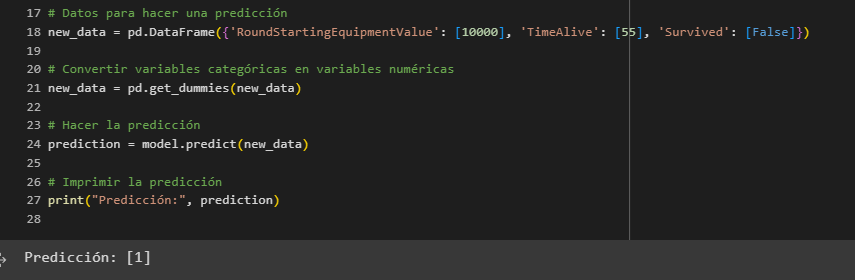

Como conclusión del modelo y la prueba una prediccion es que si el inicia con $10000 de equipamiento, que esto es mucho dinero en el videojuego (está sobre la mediana) esto se traduce a armas más potentes que permitan eliminar a los enemigos más sencillo, tambien que dure 55 segundos vivos, que eso también es harto ya que normalmente dura un minuto y medio. tambien se le dio que no sobreviva en la ronda. como resultado del modelo es que el jugador ganará la ronda. Esto es razonable porque el dinero que tiene y el tiempo que está vivo es sobre la media.

## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo